This Exam Question 3

1.

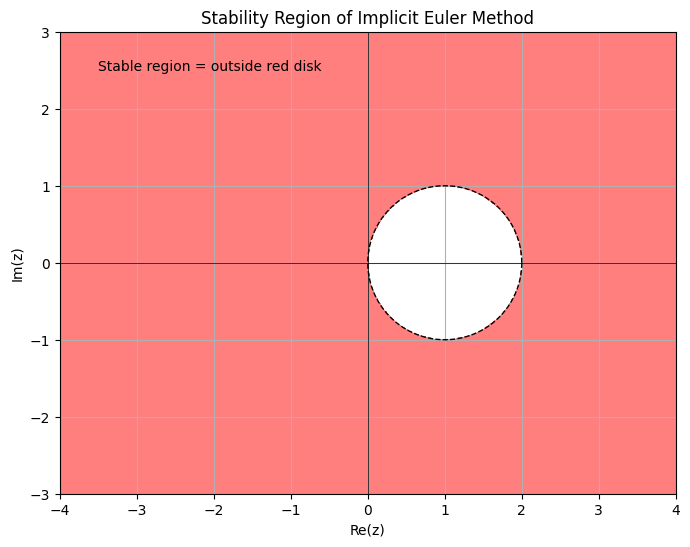

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid in the complex plane
x = np.linspace(-4, 4, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Amplification factor for implicit Euler: G(z) = 1 / (1 - z)
G = 1 / (1 - Z)
amplification = np.abs(G)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, amplification <= 1, levels=1, colors=["white", "red"], alpha=0.5)

# Reference: Unit circle centered at (1, 0)
theta = np.linspace(0, 2 * np.pi, 300)
circle_x = 1 + np.cos(theta)
circle_y = np.sin(theta)
plt.plot(circle_x, circle_y, 'k--', linewidth=1)

# Axis settings
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Stability Region of Implicit Euler Method")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.xlim([-4, 4])
plt.ylim([-3, 3])
plt.grid(True)
plt.gca().set_aspect('equal')
plt.text(-3.5, 2.5, "Stable region = outside red disk", fontsize=10)

plt.show()


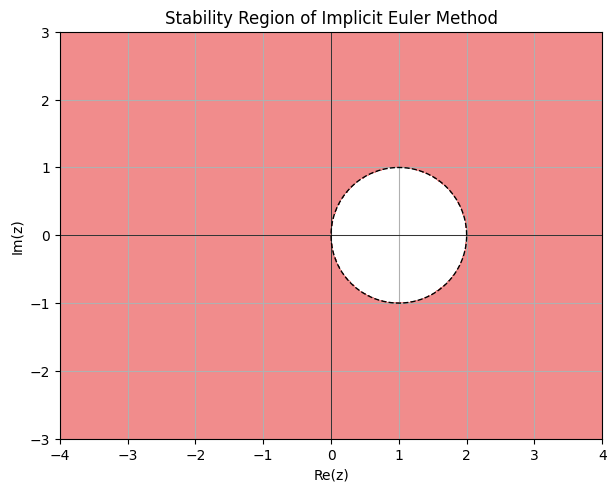

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid in the complex plane
x = np.linspace(-4, 4, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Amplification factor for implicit Euler: G(z) = 1 / (1 - z)
G = 1 / (1 - Z)
amplification = np.abs(G)

# Plotting
plt.figure(figsize=(7, 6))
plt.contourf(X, Y, amplification <= 1, levels=1, colors=["white", "lightcoral"], alpha=0.9)

# Unit circle centered at (1, 0)
theta = np.linspace(0, 2 * np.pi, 300)
circle_x = 1 + np.cos(theta)
circle_y = np.sin(theta)
plt.plot(circle_x, circle_y, 'k--', linewidth=1)

# Axes and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Stability Region of Implicit Euler Method")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.xlim([-4, 4])
plt.ylim([-3, 3])
plt.grid(True)
plt.gca().set_aspect('equal')

plt.show()


2.

In [3]:
def implicit_euler_fixed_step(fun_jac, ta, tb, N, xa, *args):
    # Compute step size and allocate memory
    dt = (tb - ta) / N
    nx = xa.shape[0]
    X = np.zeros((N + 1, nx))
    T = np.zeros(N + 1)

    # Tolerance and max iterations for Newton’s method
    tol = 1e-8
    maxit = 100

    # Initial conditions
    T[0] = ta
    X[0, :] = xa

    # Implicit Euler loop
    for k in range(N):
        f, _ = fun_jac(T[k], X[k, :], *args)
        T[k + 1] = T[k] + dt
        x_init = X[k, :] + dt * f  # Initial guess for Newton's method
        X[k + 1, :] = newtons_method_ode(fun_jac, T[k], X[k], dt, x_init, tol, maxit, *args)

    return T, X

def newtons_method_ode(fun_jac, t, x, dt, x_init, tol, maxit, *args):
    
    x_new = x_init
    for _ in range(maxit):
        f, J = fun_jac(t + dt, x_new, *args)
        F = x_new - x - dt * f  # Residual equation
        if np.linalg.norm(F) < tol:
            return x_new
        J_implicit = np.eye(len(x)) - dt * J  # Implicit Euler Jacobian
        delta_x = np.linalg.solve(J_implicit, -F)  # Solve Newton step
        x_new += delta_x  # Update solution
    return x_new  # Return last computed valu

3.

In [4]:
import numpy as np

def implicit_euler_adaptive_step(fun_jac, t0, tf, x0,h0,abstol, reltol, *args):
    # Error controller parameters
    epstol=0.8
    facmin = 0.1  # Maximum decrease factor
    facmax = 5.0  # Maximum increase factor
    # Compute step size and allocate memory
    
    nx = x0.shape[0]
    X = np.zeros((N + 1, nx))
    T = np.zeros(N + 1)
    
    # Tolerance and max iterations for Newton’s method
    tol = 1e-8
    maxit = 100

    # Initial conditions
    t= t0
    x = np.array(x0, dtype=float)
    h = h0
   
  # Counters
    nfun = 0
    naccept = 0
    nreject = 0

    # Output storage
    T = np.array([t])  # Ensure T is a 1D NumPy array
    X = np.array([x])  # Ensure X is a 2D NumPy array

        # Algorithm
    while t < tf:
        if t + h > tf:
            h = tf - t

        f, J = fun_jac(t, x, *args)

        AcceptStep = False

        while not AcceptStep:
            
            #TODO: should f be calulated inside or outside of this loop
            x1_init = x + h * f
            x1 = newtons_method_ode(fun_jac, t, x, h, x1_init, tol, maxit, *args) 


            #half step
            hm = 0.5 * h
            tm = t + hm
            xm_init = x + hm * f


            xm = newtons_method_ode(fun_jac, tm, x, hm, xm_init, tol, maxit, *args)
            
            
            
            #to step final solution
            fm, _ = fun_jac(t, x, *args)
            x1hat = xm + hm * fm

            x1hat_final = newtons_method_ode(fun_jac, tm, xm, hm, x1hat, tol, maxit, *args)

            # Error estimation
            e = x1hat_final - x1
            denom = np.maximum(abstol, np.abs(x1hat) * reltol)  # Fix element-wise max
            
            r = np.max(np.abs(e) / denom)  # Compute max ratio

            AcceptStep = r <= epstol

            if AcceptStep:
                t = t + h
                x = x1hat

                naccept += 1
                T = np.append(T, t)  # Append t to the 1D array
                X = np.vstack([X, x1hat.reshape(1, -1)])  # Ensure correct shape
            else:
                nreject += 1

            h = np.max([facmin, np.min([np.sqrt(epstol / r), facmax])]) * h


    return (T,X),nreject


4.

In [6]:
from project.models import PreyPredator, VanDerPol, CSTR3, CSTR1
from project.solver import adaptive_dopri54
import numpy as np

In [ ]:
#need plots of different settings
#include ode45 and ode15s in the plots
#should I include it in the plots or just comment on it?
# Initial Conditions


Van der pool

In [ ]:
y0 = np.array([2.0, 0])
t0, tf = 0, 30

# Instantiate and Solve
solver = DOPRI54(lambda t, y: VanDerPol(t, y))

Prey pred

In [7]:
models = [PreyPredator(), VanDerPol(), CSTR3(), CSTR1()]
for model in models:
    print(f"\nRunning on {model.__class__.__name__}")
    x0 = model.x0
    t0 = model.t0
    tf = model.tf

    # Adaptive
    (T_adapt, X_adapt), nreject = implicit_euler_adaptive_step(
        model.fun_jac, t0, tf, x0, h0=0.1, abstol=1e-6, reltol=1e-3
    )
    print(f"Adaptive step: {len(T_adapt)} steps, {nreject} rejected")

    # Fixed step
    N = 100
    T_fixed, X_fixed = implicit_euler_fixed_step(
        model.fun_jac, t0, tf, N, x0
    )
    print(f"Fixed step: {len(T_fixed)} steps")


TypeError: PreyPredator() missing 2 required positional arguments: 't' and 'x'

In [9]:
# Redefine initial conditions for this scope
C0 = np.array([3.4, 3.7, 200])  # for CSTR3
T0 = 273.15  

In [11]:
import numpy as np

def newtons_method_ode(fun_jac, t, x, dt, x_init, tol, maxit, *args):
    x = np.atleast_1d(x)
    x_new = np.atleast_1d(x_init)
    for _ in range(maxit):
        f, J = fun_jac(t + dt, x_new, *args)
        F = x_new - x - dt * f
        if np.linalg.norm(F) < tol:
            return x_new
        J_implicit = np.eye(len(x)) - dt * J
        delta_x = np.linalg.solve(J_implicit, -F)
        x_new += delta_x
    return x_new

def implicit_euler_adaptive_step(fun_jac, t0, tf, x0, h0, abstol, reltol, *args):
    epstol = 0.8
    facmin = 0.1
    facmax = 5.0
    tol = 1e-8
    maxit = 100

    t = t0
    x = np.atleast_1d(np.array(x0, dtype=float))
    h = h0

    T = [t]
    X = [x.copy()]
    naccept, nreject = 0, 0

    while t < tf:
        if t + h > tf:
            h = tf - t

        f, _ = fun_jac(t, x, *args)

        AcceptStep = False
        while not AcceptStep:
            x1_init = x + h * f
            x1 = newtons_method_ode(fun_jac, t, x, h, x1_init, tol, maxit, *args)

            hm = 0.5 * h
            tm = t + hm
            xm_init = x + hm * f
            xm = newtons_method_ode(fun_jac, tm, x, hm, xm_init, tol, maxit, *args)

            fm, _ = fun_jac(tm, xm, *args)
            x1hat = xm + hm * fm
            x1hat_final = newtons_method_ode(fun_jac, tm, xm, hm, x1hat, tol, maxit, *args)

            e = x1hat_final - x1
            denom = np.maximum(abstol, np.abs(x1hat_final) * reltol)
            r = np.max(np.abs(e) / denom)

            AcceptStep = r <= epstol
            if AcceptStep:
                t += h
                x = x1hat_final
                T.append(t)
                X.append(x.copy())
                naccept += 1
            else:
                nreject += 1

            h *= max(facmin, min(np.sqrt(epstol / max(r, 1e-12)), facmax))

    return (np.array(T), np.vstack(X)), nreject

def implicit_euler_fixed_step(fun_jac, ta, tb, N, xa, *args):
    dt = (tb - ta) / N
    xa = np.atleast_1d(np.array(xa))
    nx = xa.shape[0]
    X = np.zeros((N + 1, nx))
    T = np.zeros(N + 1)

    tol = 1e-8
    maxit = 100

    T[0] = ta
    X[0, :] = xa

    for k in range(N):
        f, _ = fun_jac(T[k], X[k, :], *args)
        T[k + 1] = T[k] + dt
        x_init = X[k, :] + dt * f
        X[k + 1, :] = newtons_method_ode(fun_jac, T[k], X[k], dt, x_init, tol, maxit, *args)

    return T, X


In [12]:
from project.models import PreyPredator_Fun_Jac,VanDerPol_Fun_Jac,CSTR3_Fun_Jac,CSTR1_Fun_Jac

test_cases = [
    ("PreyPredator", [10.0, 5.0], PreyPredator_Fun_Jac),
    ("VanDerPol", [2.0, 0.0], VanDerPol_Fun_Jac),
    ("CSTR3", C0, CSTR3_Fun_Jac),
    ("CSTR1", T0, CSTR1_Fun_Jac),
]


for name, x0, fun_jac in test_cases:
    print(f"\nRunning {name}...")

    # Adaptive
    try:
        (T_adapt, X_adapt), nreject = implicit_euler_adaptive_step(
            fun_jac, t0=0.0, tf=5.0, x0=np.array(x0), h0=0.1,
            abstol=1e-6, reltol=1e-3
        )
        print(f"{name} — Adaptive Euler: {len(T_adapt)} steps, {nreject} rejected")
    except Exception as e:
        print(f"{name} — Adaptive Euler FAILED: {e}")

    # Fixed
    try:
        T_fixed, X_fixed = implicit_euler_fixed_step(
            fun_jac, ta=0.0, tb=5.0, N=100, xa=np.array(x0)
        )
        print(f"{name} — Fixed Euler: {len(T_fixed)} steps")
    except Exception as e:
        print(f"{name} — Fixed Euler FAILED: {e}")





Running PreyPredator...
PreyPredator — Adaptive Euler: 234 steps, 398 rejected
PreyPredator — Fixed Euler: 101 steps

Running VanDerPol...
VanDerPol — Adaptive Euler: 66 steps, 19 rejected
VanDerPol — Fixed Euler: 101 steps

Running CSTR3...
CSTR3 — Adaptive Euler: 10 steps, 0 rejected
CSTR3 — Fixed Euler: 101 steps

Running CSTR1...
CSTR1 — Adaptive Euler: 5 steps, 0 rejected
CSTR1 — Fixed Euler: 101 steps


In [13]:
import matplotlib.pyplot as plt

def plot_results(name, T_adapt, X_adapt, T_fixed, X_fixed):
    X_adapt = np.atleast_2d(X_adapt)
    X_fixed = np.atleast_2d(X_fixed)

    num_states = X_adapt.shape[1]
    fig, axes = plt.subplots(num_states, 1, figsize=(8, 2.5 * num_states), sharex=True)

    if num_states == 1:
        axes = [axes]

    for i in range(num_states):
        axes[i].plot(T_adapt, X_adapt[:, i], label='Adaptive', lw=2)
        axes[i].plot(T_fixed, X_fixed[:, i], '--', label='Fixed', lw=1.5)
        axes[i].set_ylabel(f'State {i}')
        axes[i].legend()
        axes[i].grid(True)

    axes[-1].set_xlabel("Time")
    fig.suptitle(f"{name} – Implicit Euler Comparison", fontsize=14)
    plt.tight_layout()
    plt.show()



Running PreyPredator...
PreyPredator — Adaptive Euler: 234 steps, 398 rejected
PreyPredator — Fixed Euler: 101 steps


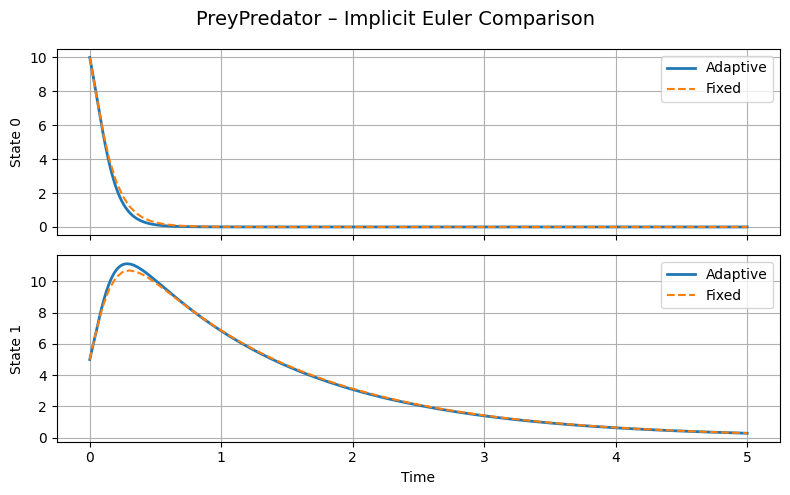


Running VanDerPol...
VanDerPol — Adaptive Euler: 66 steps, 19 rejected
VanDerPol — Fixed Euler: 101 steps


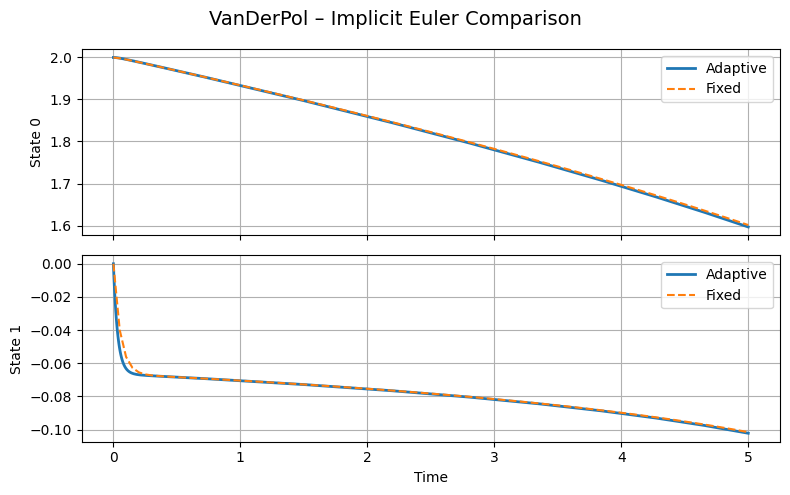


Running CSTR3...
CSTR3 — Adaptive Euler: 10 steps, 0 rejected
CSTR3 — Fixed Euler: 101 steps


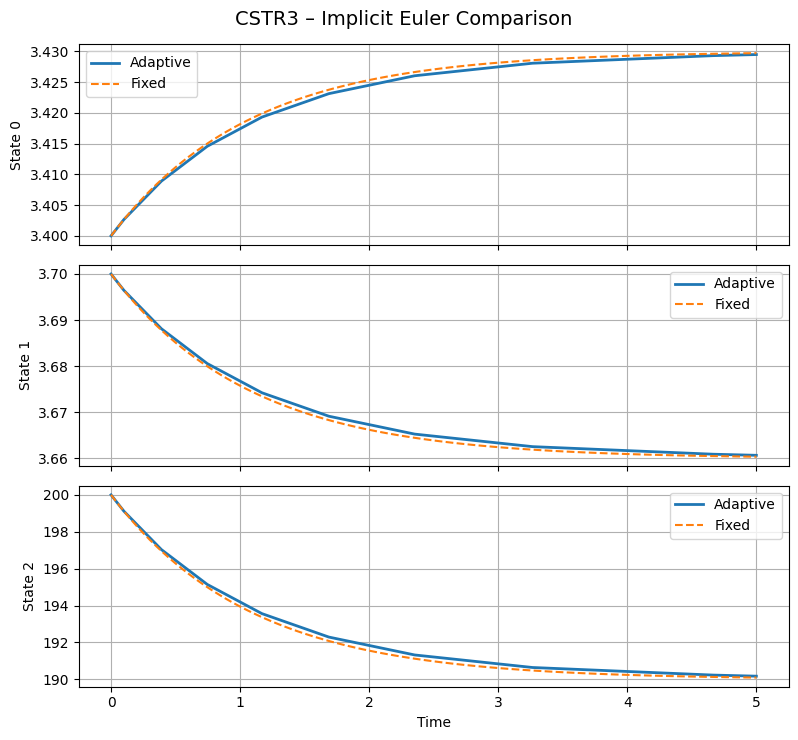


Running CSTR1...
CSTR1 — Adaptive Euler: 5 steps, 0 rejected
CSTR1 — Fixed Euler: 101 steps


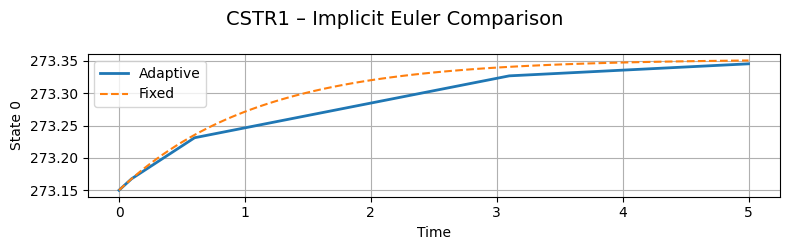

In [14]:
test_cases = [
    ("PreyPredator", [10.0, 5.0], PreyPredator_Fun_Jac),
    ("VanDerPol", [2.0, 0.0], VanDerPol_Fun_Jac),
    ("CSTR3", np.array([3.4, 3.7, 200]), CSTR3_Fun_Jac),
    ("CSTR1", np.array([273.15]), CSTR1_Fun_Jac),
]

for name, x0, fun_jac in test_cases:
    print(f"\nRunning {name}...")

    try:
        (T_adapt, X_adapt), nreject = implicit_euler_adaptive_step(
            fun_jac, t0=0.0, tf=5.0, x0=x0, h0=0.1,
            abstol=1e-6, reltol=1e-3
        )
        print(f"{name} — Adaptive Euler: {len(T_adapt)} steps, {nreject} rejected")
    except Exception as e:
        print(f"{name} — Adaptive Euler FAILED: {e}")
        T_adapt, X_adapt = [], []

    try:
        T_fixed, X_fixed = implicit_euler_fixed_step(
            fun_jac, ta=0.0, tb=5.0, N=100, xa=x0
        )
        print(f"{name} — Fixed Euler: {len(T_fixed)} steps")
    except Exception as e:
        print(f"{name} — Fixed Euler FAILED: {e}")
        T_fixed, X_fixed = [], []

    if len(T_adapt) > 0 and len(T_fixed) > 0:
        plot_results(name, T_adapt, X_adapt, T_fixed, X_fixed)


Interisting, the adaptive looks worse for the CSTR1 for implicit euler ?


In [41]:
from scipy.integrate import solve_ivp


def plot_results_with_reference(name, fun_jac, x0, t_span):
    t0, tf = t_span
    x0 = np.atleast_1d(np.array(x0))

    # Define RHS and Jacobian from fun_jac
    def rhs(t, x):
        return fun_jac(t, x)[0]
    
    def jac(t, x):
        return fun_jac(t, x)[1]

    t_eval = np.linspace(t0, tf, 1000)

    # Reference solutions using solve_ivp
    sol_ode45 = solve_ivp(rhs, [t0, tf], x0, t_eval=t_eval, method='RK45', atol=1e-9, rtol=1e-7)
    sol_ode15s = solve_ivp(rhs, [t0, tf], x0, t_eval=t_eval, method='BDF', jac=jac, atol=1e-9, rtol=1e-7)

    # Our implicit solvers
    (T_adapt, X_adapt), _ = implicit_euler_adaptive_step(
        fun_jac, t0, tf, x0, h0=0.1, abstol=1e-6, reltol=1e-3
    )
    T_fixed, X_fixed = implicit_euler_fixed_step(fun_jac, t0, tf, 100, x0)

    # Ensure 2D format
    X_adapt = np.atleast_2d(X_adapt)
    X_fixed = np.atleast_2d(X_fixed)
    Y_ode45 = np.atleast_2d(sol_ode45.y).T
    Y_ode15s = np.atleast_2d(sol_ode15s.y).T

    num_states = X_adapt.shape[1]
    fig, axes = plt.subplots(num_states, 1, figsize=(8, 2.5 * num_states), sharex=True)

    if num_states == 1:
        axes = [axes]

    for i in range(num_states):
        axes[i].plot(T_adapt, X_adapt[:, i], label='Implicit Euler (adaptive)', lw=2)
        axes[i].plot(T_fixed, X_fixed[:, i], '--', label='Implicit Euler (fixed)', lw=1.5)
        axes[i].plot(sol_ode45.t, Y_ode45[:, i], ':', label='RK45 (ode45)', lw=1.5)
        axes[i].plot(sol_ode15s.t, Y_ode15s[:, i], '-.', label='BDF (ode15s)', lw=1.5)
        axes[i].set_ylabel(f'State {i}')
        axes[i].legend()
        axes[i].grid(True)

    axes[-1].set_xlabel("Time")
    fig.suptitle(f"{name} — Different Solvers", fontsize=14)
    plt.tight_layout()
    plt.show()


In [17]:
test_cases = [
    ("PreyPredator", [10.0, 5.0], PreyPredator_Fun_Jac),
    ("VanDerPol", [2.0, 0.0], VanDerPol_Fun_Jac),
    ("CSTR3", np.array([3.4, 3.7, 200]), CSTR3_Fun_Jac),
    ("CSTR1", np.array([273.15]), CSTR1_Fun_Jac),
]

for name, x0, fun_jac in test_cases:
    print(f"\nRunning {name}...")

    try:
        (T_adapt, X_adapt), nreject = implicit_euler_adaptive_step(
            fun_jac, t0=0.0, tf=5.0, x0=x0, h0=0.1,
            abstol=1e-6, reltol=1e-3
        )
        print(f"{name} — Adaptive Euler: {len(T_adapt)} steps, {nreject} rejected")
    except Exception as e:
        print(f"{name} — Adaptive Euler FAILED: {e}")
        T_adapt, X_adapt = [], []

    try:
        T_fixed, X_fixed = implicit_euler_fixed_step(
            fun_jac, ta=0.0, tb=5.0, N=100, xa=x0
        )
        print(f"{name} — Fixed Euler: {len(T_fixed)} steps")
    except Exception as e:
        print(f"{name} — Fixed Euler FAILED: {e}")
        T_fixed, X_fixed = [], []

    if len(T_adapt) > 0 and len(T_fixed) > 0:
        plot_results_with_reference(name, T_adapt, X_adapt, T_fixed, X_fixed)



Running PreyPredator...
PreyPredator — Adaptive Euler: 234 steps, 398 rejected
PreyPredator — Fixed Euler: 101 steps


TypeError: plot_results_with_reference() takes 4 positional arguments but 5 were given


Running PreyPredator...


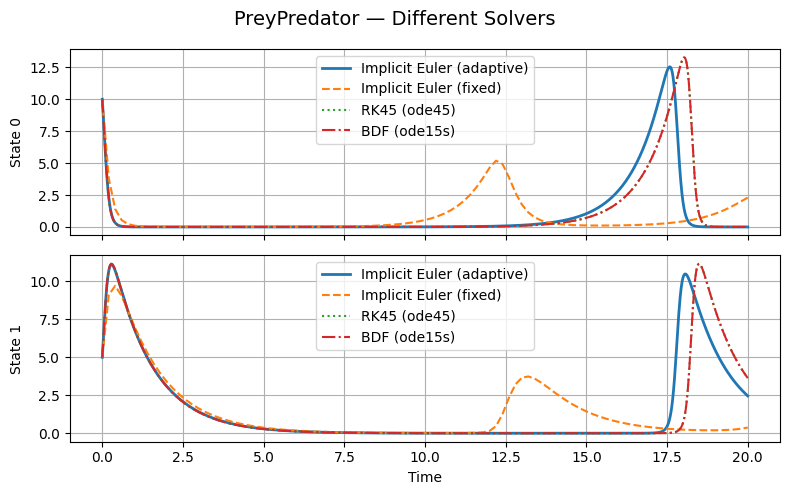


Running VanDerPol...


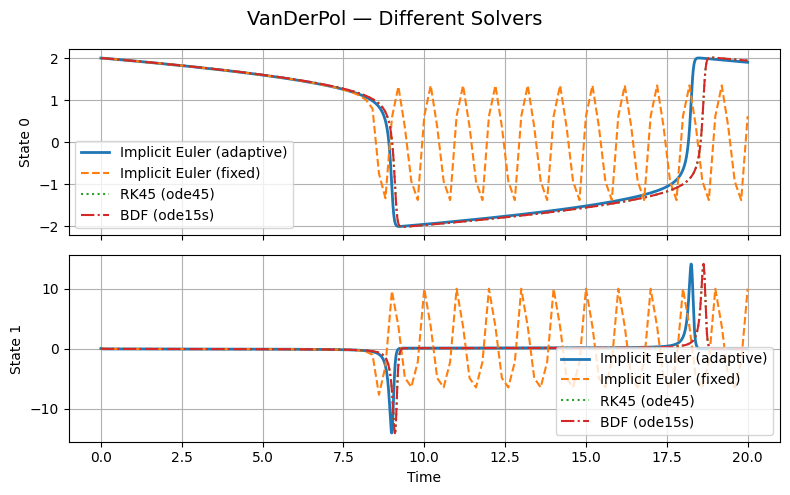


Running CSTR3...


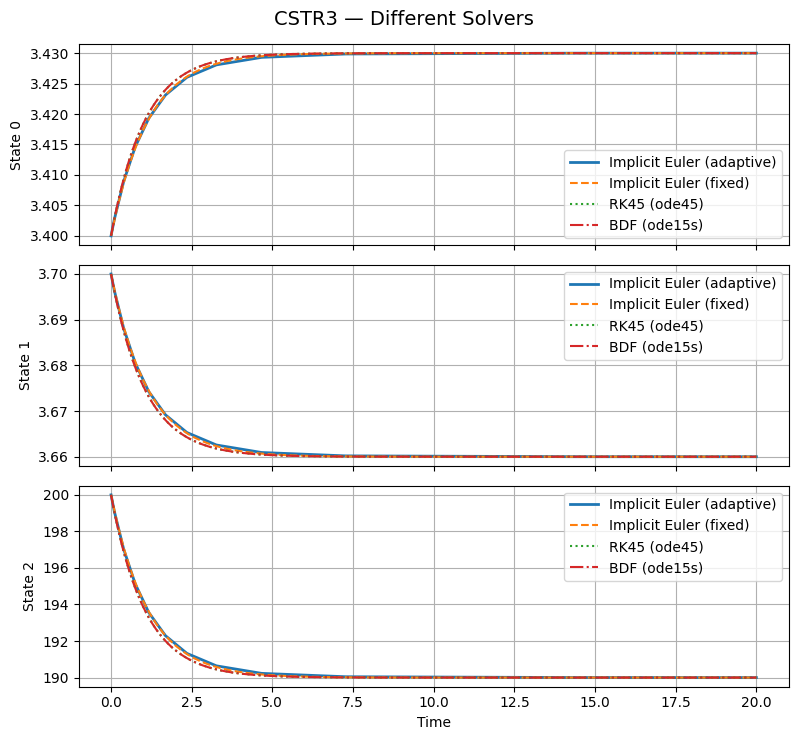


Running CSTR1...


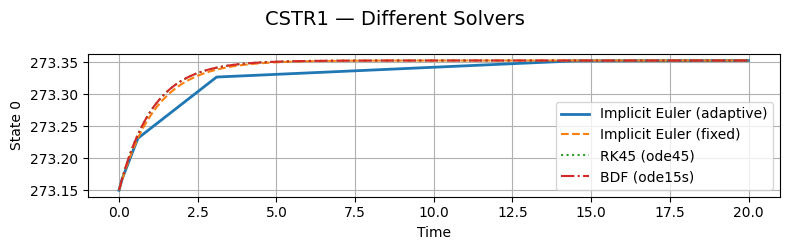

In [44]:
test_cases = [
    ("PreyPredator", [10.0, 5.0], PreyPredator_Fun_Jac),
    ("VanDerPol", [2.0, 0.0], VanDerPol_Fun_Jac),
    ("CSTR3", np.array([3.4, 3.7, 200]), CSTR3_Fun_Jac),
    ("CSTR1", np.array([273.15]), CSTR1_Fun_Jac),
]

for name, x0, fun_jac in test_cases:
    print(f"\nRunning {name}...")
    try:
        plot_results_with_reference(name, fun_jac, x0, t_span=(0.0, 20.0))
    except Exception as e:
        print(f"{name} FAILED: {e}")

Doing some comparison of stepsizes

In [21]:
import matplotlib.pyplot as plt

def fixed_step_convergence_study(name, fun_jac, x0, t_span):
    t0, tf = t_span
    x0 = np.atleast_1d(x0)
    
    # Reference solution (very accurate BDF)
    def rhs(t, x): return fun_jac(t, x)[0]
    def jac(t, x): return fun_jac(t, x)[1]
    
    sol_ref = solve_ivp(rhs, [t0, tf], x0, method='BDF', jac=jac, atol=1e-10, rtol=1e-10)
    x_ref = sol_ref.y[:, -1]

    N_vals = [25, 50, 100, 200, 400, 800]
    errors = []
    hs = []

    for N in N_vals:
        T, X = implicit_euler_fixed_step(fun_jac, t0, tf, N, x0)
        x_final = X[-1, :]
        err = np.linalg.norm(x_final - x_ref, ord=2)
        errors.append(err)
        hs.append((tf - t0) / N)

    # Plot log-log error vs h
    plt.figure(figsize=(6, 4))
    plt.loglog(hs, errors, 'o-', lw=2)
    plt.grid(True, which="both", ls="--")
    plt.xlabel("Step size h")
    plt.ylabel("Global error at t = tf")
    plt.title(f"{name} — Fixed-Step Convergence")
    plt.show()


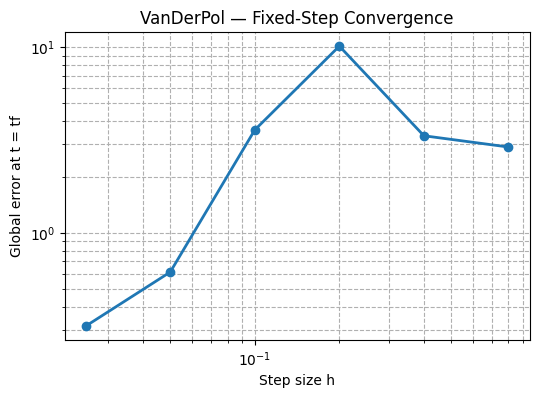

In [22]:
x0 = np.array([2.0, 0.0])
fixed_step_convergence_study("VanDerPol", VanDerPol_Fun_Jac, x0, t_span=(0.0, 20.0))


In [39]:
def plot_fixed_step_solutions(name, fun_jac, x0, t_span):
    t0, tf = t_span
    x0 = np.atleast_1d(x0)

    N_vals = [25, 50, 100, 200, 400, 800]
    state_idx = 0  # index of the state variable to plot

    plt.figure(figsize=(10, 6))
    for N in N_vals:
        T, X = implicit_euler_fixed_step(fun_jac, t0, tf, N, x0)
        X = np.atleast_2d(X)
        label = f'N={N}, h={(tf - t0) / N:.3f}'
        plt.plot(T, X[:, state_idx], label=label)

    # Reference solution
    def rhs(t, x): return fun_jac(t, x)[0]
    sol_ref = solve_ivp(rhs, [t0, tf], x0, method='BDF', atol=1e-10, rtol=1e-10)
    plt.plot(sol_ref.t, sol_ref.y[state_idx], 'k--', lw=2, label='Reference (BDF)')

    plt.title(f'{name} – Fixed-Step Implicit Euler x1 at Various Step Sizes')
    plt.xlabel("Time")
    plt.ylabel("x1")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


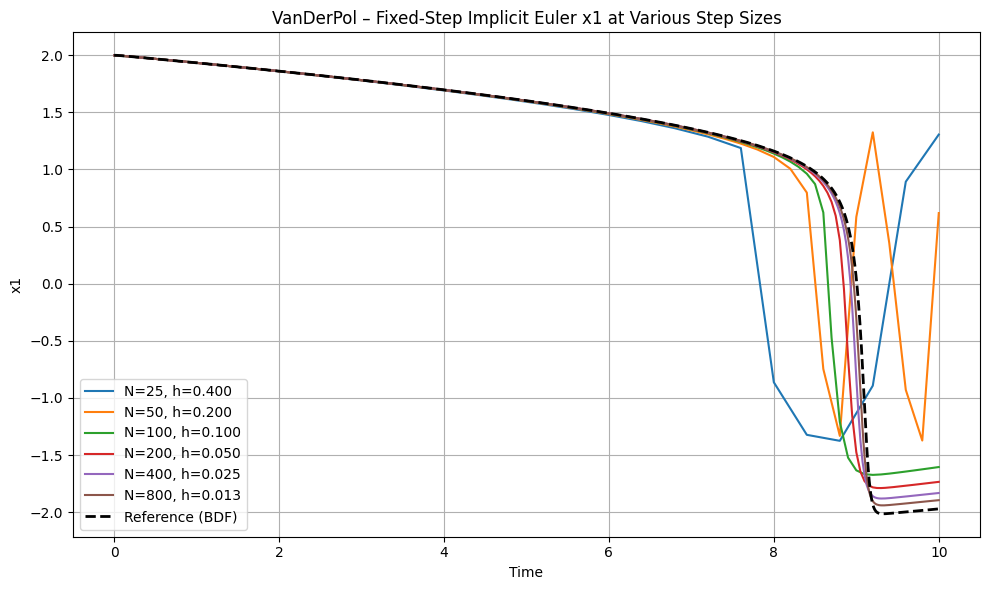

In [40]:
x0 = np.array([2.0, 0.0])
plot_fixed_step_solutions("VanDerPol", VanDerPol_Fun_Jac, x0, t_span=(0.0, 10.0))


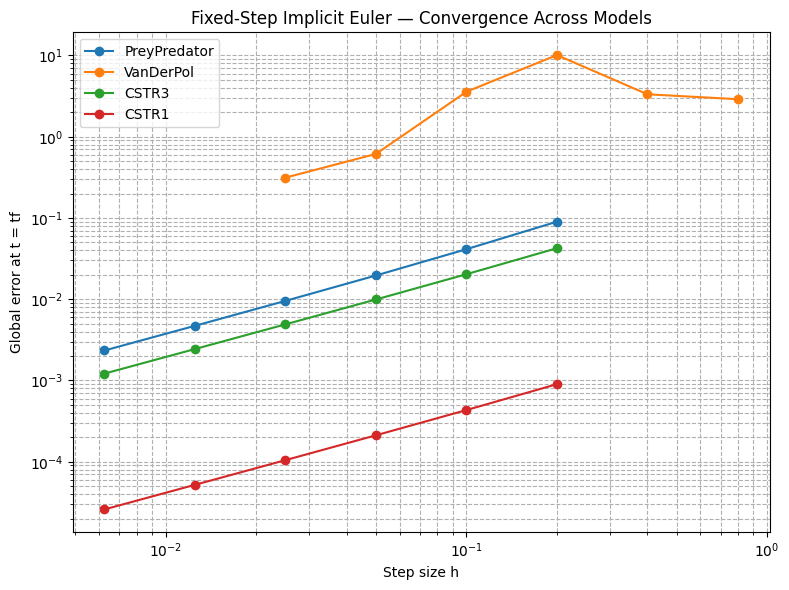

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Assumes these are available
from project.models import (
    PreyPredator_Fun_Jac, VanDerPol_Fun_Jac, CSTR3_Fun_Jac, CSTR1_Fun_Jac
)

# Convergence study for one model
def convergence_study(name, fun_jac, x0, t_span):
    t0, tf = t_span
    x0 = np.atleast_1d(np.array(x0))
    
    def rhs(t, x): return fun_jac(t, x)[0]
    def jac(t, x): return fun_jac(t, x)[1]

    # Reference solution (high-accuracy BDF)
    sol_ref = solve_ivp(rhs, [t0, tf], x0, method='BDF', jac=jac, atol=1e-10, rtol=1e-10)
    x_ref = sol_ref.y[:, -1]

    N_vals = [25, 50, 100, 200, 400, 800]
    errors = []
    hs = []

    for N in N_vals:
        T, X = implicit_euler_fixed_step(fun_jac, t0, tf, N, x0)
        x_final = X[-1, :]
        err = np.linalg.norm(x_final - x_ref, ord=2)
        errors.append(err)
        hs.append((tf - t0) / N)

    return hs, errors

# List of test problems
test_cases = [
    ("PreyPredator", [10.0, 5.0], PreyPredator_Fun_Jac, (0.0, 5.0)),
    ("VanDerPol", [2.0, 0.0], VanDerPol_Fun_Jac, (0.0, 20.0)),
    ("CSTR3", [3.4, 3.7, 200], CSTR3_Fun_Jac, (0.0, 5.0)),
    ("CSTR1", [273.15], CSTR1_Fun_Jac, (0.0, 5.0)),
]

# Plot all convergence results
plt.figure(figsize=(8, 6))
for name, x0, fun_jac, t_span in test_cases:
    hs, errors = convergence_study(name, fun_jac, x0, t_span)
    plt.loglog(hs, errors, marker='o', label=name)

plt.xlabel("Step size h")
plt.ylabel("Global error at t = tf")
plt.title("Fixed-Step Implicit Euler — Convergence Across Models")
plt.grid(True, which="both", linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


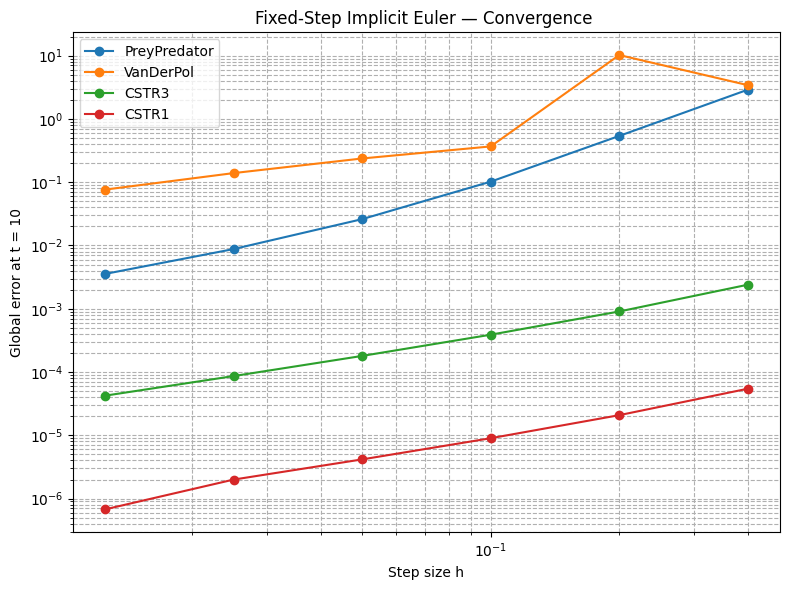

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from project.models import (
    PreyPredator_Fun_Jac, VanDerPol_Fun_Jac, CSTR3_Fun_Jac, CSTR1_Fun_Jac
)

def convergence_study(name, fun_jac, x0, t_span):
    t0, tf = t_span
    x0 = np.atleast_1d(np.array(x0))

    def rhs(t, x): return fun_jac(t, x)[0]
    def jac(t, x): return fun_jac(t, x)[1]

    # Accurate reference solution
    sol_ref = solve_ivp(rhs, [t0, tf], x0, method='BDF', jac=jac, atol=1e-10, rtol=1e-10)
    x_ref = sol_ref.y[:, -1]

    N_vals = [25, 50, 100, 200, 400, 800]
    errors = []
    hs = []

    for N in N_vals:
        T, X = implicit_euler_fixed_step(fun_jac, t0, tf, N, x0)
        x_final = X[-1, :]
        err = np.linalg.norm(x_final - x_ref, ord=2)
        errors.append(err)
        hs.append((tf - t0) / N)

    return hs, errors

# Fixed time interval for all problems
t_span = (0.0, 10.0)

test_cases = [
    ("PreyPredator", [10.0, 5.0], PreyPredator_Fun_Jac),
    ("VanDerPol", [2.0, 0.0], VanDerPol_Fun_Jac),
    ("CSTR3", [3.4, 3.7, 200], CSTR3_Fun_Jac),
    ("CSTR1", [273.15], CSTR1_Fun_Jac),
]

# Run and plot convergence curves
plt.figure(figsize=(8, 6))
for name, x0, fun_jac in test_cases:
    hs, errors = convergence_study(name, fun_jac, x0, t_span)
    plt.loglog(hs, errors, marker='o', label=name)

plt.xlabel("Step size h")
plt.ylabel("Global error at t = 10")
plt.title("Fixed-Step Implicit Euler — Convergence ")
plt.grid(True, which="both", linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


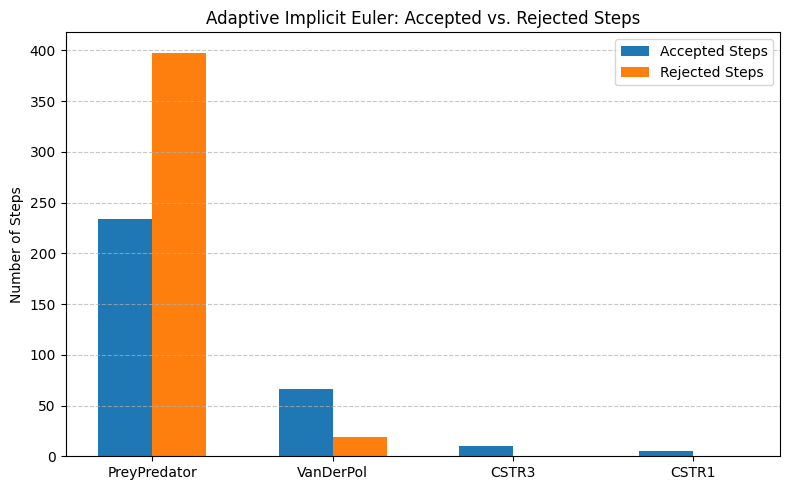

In [43]:
models = ["PreyPredator", "VanDerPol", "CSTR3", "CSTR1"]
accepted_steps = [234, 66, 10, 5]
rejected_steps = [398, 19, 0, 0]

x = np.arange(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x - 0.15, accepted_steps, width=0.3, label="Accepted Steps")
plt.bar(x + 0.15, rejected_steps, width=0.3, label="Rejected Steps")

plt.xticks(x, models)
plt.ylabel("Number of Steps")
plt.title("Adaptive Implicit Euler: Accepted vs. Rejected Steps")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
##include the others 